In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import json

In [2]:
df = pd.read_csv('bengaluru_house_prices.csv')

In [3]:
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [4]:
df.shape

(13320, 9)

In [5]:
df.isnull().sum()

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

# Filling missing values

In [6]:
loc_drop = df.loc[df["location"].isnull()].index

df.drop(loc_drop, inplace=True)

In [7]:
size_drop = df.loc[df["size"].isnull()].index

df.drop(size_drop, inplace=True)

In [8]:
df["society"] = df["society"].fillna(method="ffill").fillna(method="bfill")

C:\Users\Andrii\AppData\Local\Temp\ipykernel_19844\3749337477.py:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df["society"] = df["society"].fillna(method="ffill").fillna(method="bfill")


In [9]:
df['bath'] = (df['bath'].fillna(df['bath'].mean())).astype(int)

In [10]:
df['balcony'] = (df['balcony'].fillna(df['balcony'].mean())).astype(int)

In [11]:
dfcat = df.copy()

# EDA

In [12]:
df["area_type"].value_counts()

area_type
Super built-up  Area    8789
Built-up  Area          2418
Plot  Area              2009
Carpet  Area              87
Name: count, dtype: int64

In [13]:
df['availability'].value_counts()

availability
Ready To Move    10580
18-Dec             307
18-May             295
18-Apr             271
18-Aug             200
                 ...  
15-Aug               1
17-Jan               1
16-Nov               1
16-Jan               1
14-Jul               1
Name: count, Length: 80, dtype: int64

In [14]:
df['location'].value_counts()

location
Whitefield           539
Sarjapur  Road       397
Electronic City      302
Kanakpura Road       273
Thanisandra          234
                    ... 
Vidyapeeta             1
Maruthi Extension      1
Okalipura              1
Old Town               1
Abshot Layout          1
Name: count, Length: 1304, dtype: int64

In [15]:
df['size'].value_counts()

size
2 BHK         5199
3 BHK         4309
4 Bedroom      826
4 BHK          591
3 Bedroom      547
1 BHK          538
2 Bedroom      329
5 Bedroom      297
6 Bedroom      191
1 Bedroom      105
8 Bedroom       84
7 Bedroom       83
5 BHK           59
9 Bedroom       46
6 BHK           30
7 BHK           17
1 RK            13
10 Bedroom      12
9 BHK            8
8 BHK            5
11 BHK           2
11 Bedroom       2
10 BHK           2
14 BHK           1
13 BHK           1
12 Bedroom       1
27 BHK           1
43 Bedroom       1
16 BHK           1
19 BHK           1
18 Bedroom       1
Name: count, dtype: int64

In [16]:
df['society'].value_counts()

society
PrarePa    130
GrrvaGr    123
Prityel     96
Sryalan     95
Prtates     95
          ... 
Sanstya      1
Shireru      1
Amais V      1
CMhamai      1
RSntsAp      1
Name: count, Length: 2676, dtype: int64

In [17]:
df.head(5)

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2,1,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5,3,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,Theanmp,1440,2,3,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3,1,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,Soiewre,1200,2,1,51.00


In [18]:
df['location'].value_counts()

location
Whitefield           539
Sarjapur  Road       397
Electronic City      302
Kanakpura Road       273
Thanisandra          234
                    ... 
Vidyapeeta             1
Maruthi Extension      1
Okalipura              1
Old Town               1
Abshot Layout          1
Name: count, Length: 1304, dtype: int64

In [19]:
df.head(5)

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2,1,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5,3,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,Theanmp,1440,2,3,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3,1,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,Soiewre,1200,2,1,51.00


In [20]:
import pandas as pd
import re

# Ensure 'size' column is treated safely with .apply()
df['size'] = df['size'].apply(lambda x: int(''.join(re.findall(r'\d+', str(x)))) if pd.notna(x) else 0)

    

In [21]:
df['size'] = df['size'].apply(lambda x: min(x, 10))  # Cap at 10


In [22]:
df.drop('society', axis=1, inplace=True)

In [23]:
df['bath'] = df['bath'].apply(lambda x: min(x, 10))

In [24]:
df['bath'].value_counts()

bath
2     6965
3     3285
4     1226
1      788
5      524
6      273
7      102
8       64
9       43
10      33
Name: count, dtype: int64

In [25]:
df['bath'] = df['bath'].astype(int)

In [26]:
bin_edges = [0, 4, 7, 10]
bin_labels = [1, 2, 3]

df['bath category'] = pd.cut(df['bath'], bins=bin_edges, labels=bin_labels, right=True)

In [27]:
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True

In [28]:
df[~df['total_sqft'].apply(is_float)]

,area_type,availability,location,size,total_sqft,bath,balcony,price,bath category
30,Super built-up Area,19-Dec,Yelahanka,4,2100 - 2850,4,0,186.000,1
56,Built-up Area,20-Feb,Devanahalli,4,3010 - 3410,2,1,192.000,1
81,Built-up Area,18-Oct,Hennur Road,4,2957 - 3450,2,1,224.500,1
122,Super built-up Area,18-Mar,Hebbal,4,3067 - 8156,4,0,477.000,1
137,Super built-up Area,19-Mar,8th Phase JP Nagar,2,1042 - 1105,2,0,54.005,1
...,...,...,...,...,...,...,...,...,...
12990,Super built-up Area,18-May,Talaghattapura,3,1804 - 2273,3,0,122.000,1
13059,Super built-up Area,Ready To Move,Harlur,2,1200 - 1470,2,0,72.760,1
13240,Super built-up Area,Ready To Move,Devanahalli,1,1020 - 1130,2,1,52.570,1
13265,Super built-up Area,20-Sep,Hoodi,2,1133 - 1384,2,0,59.135,1


In [29]:
def convert(x):
    splitted = x.split('-')
    if len(splitted) == 2:
        return (float(splitted[0]) + float(splitted[1])) / 2
    try:
        return float(x)
    except:
        return None

In [30]:
df['total_sqft'] = df['total_sqft'].apply(convert)

In [31]:
df['total_sqft'] = df['total_sqft'].dropna()

In [32]:
df1 = df.copy()

In [33]:
df1['price_per_sqft'] = round(df1['price']*100000/df1['total_sqft'], 1)

In [34]:
df2 = df1.copy()

In [35]:
df2['has_balcony'] = df2['balcony'].apply(lambda x: 1 if x != 0 else 0)

In [36]:
df3 = df2.copy()

In [37]:
df4 = df3[~(df3['total_sqft'] / df3['size'] < 300)]

In [38]:
df4.shape

(12560, 11)

In [39]:
df4['price_per_sqft'].describe()

count     12514.000000
mean       6307.167940
std        4160.878326
min         267.800000
25%        4210.500000
50%        5294.750000
75%        6916.700000
max      176470.600000
Name: price_per_sqft, dtype: float64

In [40]:
df5 = df4.copy()

In [41]:
mean = df4['price_per_sqft'].mean()
std = df4['price_per_sqft'].std()

df5 = df4.loc[(df4['price_per_sqft'] > (mean - std)) & (df4['price_per_sqft'] < (mean + std))]

In [42]:
df5.shape

(11345, 11)

In [43]:
value_counts = df5['location'].value_counts()
filtered_vals = value_counts[value_counts > 10].index

filtered_vals


Index(['Whitefield', 'Sarjapur  Road', 'Electronic City', 'Kanakpura Road',
       'Thanisandra', 'Yelahanka', 'Uttarahalli', 'Marathahalli',
       'Raja Rajeshwari Nagar', 'Hebbal',
       ...
       'Banashankari Stage V', 'Prithvi Layout', 'Ulsoor',
       '2nd Phase Judicial Layout', 'Kodigehaali', 'Nehru Nagar',
       'BEML Layout', 'Pattandur Agrahara', 'Narayanapura', 'Vasanthapura'],
      dtype='object', name='location', length=205)

In [44]:
df6 = df5.copy()

In [45]:
def remove_bhk_outliers(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby('location'):
        bhk_stats = {}
        for bhk, bhk_df in location_df.groupby('size'):
            bhk_stats[bhk] = {
                'mean' : np.mean(bhk_df.price_per_sqft),
                'std' : np.std(bhk_df.price_per_sqft),
                'count' : bhk_df.shape[0]
            }
        for bhk, bhk_df in location_df.groupby('size'):
            stats = bhk_stats.get(bhk - 1)
            if stats and stats['count'] > 5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)
    return df.drop(exclude_indices, axis='index')

In [46]:
df6 = remove_bhk_outliers(df5)

In [47]:
df6['location'] = df6['location'].apply(lambda x: 'other' if x not in filtered_vals else x)

In [48]:
len(df6['location'].unique())

206

In [49]:
df6 = df6[df6.bath < df6.size + 2]

In [50]:
df7 = df6.copy()

In [51]:
df7 = df7.drop('price_per_sqft', axis=1)

In [52]:
df7.drop('bath category', axis=1, inplace=True)

In [53]:
df7.head(5)

,area_type,availability,location,size,total_sqft,bath,balcony,price,has_balcony
0,Super built-up Area,19-Dec,Electronic City Phase II,2,1056.0,2,1,39.07,1
2,Built-up Area,Ready To Move,Uttarahalli,3,1440.0,2,3,62.00,1
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3,1521.0,3,1,95.00,1
4,Super built-up Area,Ready To Move,Kothanur,2,1200.0,2,1,51.00,1
6,Super built-up Area,18-May,Old Airport Road,4,2732.0,4,1,204.00,1


array([[<Axes: title={'center': 'size'}>,
        <Axes: title={'center': 'total_sqft'}>],
       [<Axes: title={'center': 'bath'}>,
        <Axes: title={'center': 'balcony'}>],
       [<Axes: title={'center': 'price'}>,
        <Axes: title={'center': 'has_balcony'}>]], dtype=object)

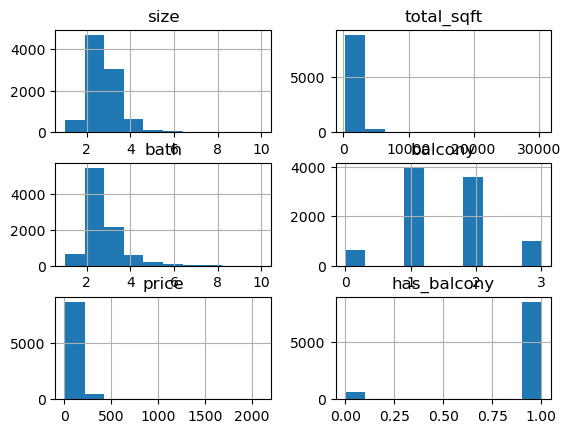

In [54]:
df7.hist()

In [55]:
df7['price'].describe()

count    9176.000000
mean       88.077998
std        71.764541
min        10.000000
25%        48.000000
50%        69.000000
75%       103.000000
max      2100.000000
Name: price, dtype: float64

In [56]:
df7 = df7.loc[df7['price'] < 1500]

In [57]:
# df7.drop(index=11748, axis=0, inplace=True)

In [58]:
df7 = df7.loc[df7['total_sqft'] < 15000]

In [59]:
df7['bath-to-bedroom-ration'] = (df7['bath'] / df7['size']).astype(int)

In [60]:
df7['availability_encoded'] = df7['availability'].apply(lambda x: 'Ready' if x == 'Ready To Move' else 'Not_ready') 

In [61]:
dummy = pd.get_dummies(df7['availability_encoded'], drop_first=True)

In [62]:
df7 = pd.concat([df7, dummy], axis=1)

In [63]:
df7.drop("availability_encoded", axis=1, inplace=True)

In [64]:
df7.head(2)

,area_type,availability,location,size,total_sqft,bath,balcony,price,has_balcony,bath-to-bedroom-ration,Ready
0,Super built-up Area,19-Dec,Electronic City Phase II,2,1056.0,2,1,39.07,1,1,False
2,Built-up Area,Ready To Move,Uttarahalli,3,1440.0,2,3,62.00,1,0,True


In [65]:
dummy1 = pd.get_dummies(df7['location'], drop_first=True)

In [66]:
df7 = pd.concat([df7, dummy1], axis=1)

In [67]:
dummy2 = pd.get_dummies(df7['area_type'], drop_first=True)

In [68]:
df7 = pd.concat([df7, dummy2], axis=1)

In [69]:
df7.head(5)

,area_type,availability,location,size,total_sqft,bath,balcony,price,has_balcony,bath-to-bedroom-ration,...,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other,Carpet Area,Plot Area,Super built-up Area
0,Super built-up Area,19-Dec,Electronic City Phase II,2,1056.0,2,1,39.07,1,1,...,False,False,False,False,False,False,False,False,False,True
2,Built-up Area,Ready To Move,Uttarahalli,3,1440.0,2,3,62.00,1,0,...,False,False,False,False,False,False,False,False,False,False
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3,1521.0,3,1,95.00,1,1,...,False,False,False,False,False,False,False,False,False,True
4,Super built-up Area,Ready To Move,Kothanur,2,1200.0,2,1,51.00,1,1,...,False,False,False,False,False,False,False,False,False,True
6,Super built-up Area,18-May,Old Airport Road,4,2732.0,4,1,204.00,1,1,...,False,False,False,False,False,False,False,False,False,True


array([[<Axes: title={'center': 'size'}>,
        <Axes: title={'center': 'total_sqft'}>,
        <Axes: title={'center': 'bath'}>],
       [<Axes: title={'center': 'balcony'}>,
        <Axes: title={'center': 'price'}>,
        <Axes: title={'center': 'has_balcony'}>],
       [<Axes: title={'center': 'bath-to-bedroom-ration'}>, <Axes: >,
        <Axes: >]], dtype=object)

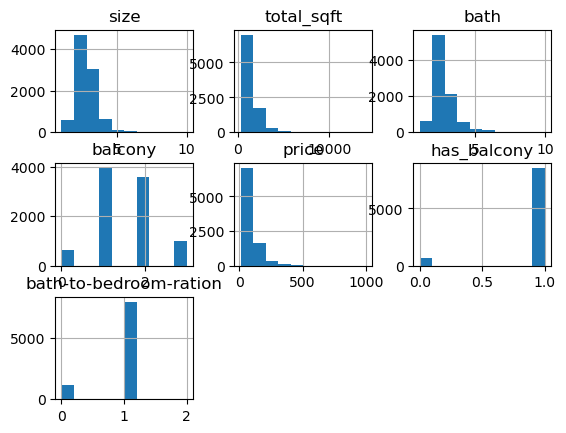

In [70]:
df7.hist()

In [71]:
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, PowerTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
import catboost as cat

categorical_features = ['availability', 'location', 'area_type']
numeric_features = ['size', 'total_sqft', 'bath', 'balcony']

X = df7.drop(['price'], axis=1)
y = df7['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

preprocessor = ColumnTransformer(
    transformers=[
        ('num', PowerTransformer(), numeric_features),  
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)  
    ]
)


In [72]:
model_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', cat.CatBoostRegressor())
])

In [73]:
model_pipeline.fit(X_train, y_train)

Learning rate set to 0.054926
0:	learn: 62.4999425	total: 151ms	remaining: 2m 31s
1:	learn: 60.0484525	total: 157ms	remaining: 1m 18s
2:	learn: 57.7680439	total: 163ms	remaining: 54.3s
3:	learn: 55.5693940	total: 169ms	remaining: 42.1s
4:	learn: 53.5407264	total: 175ms	remaining: 34.9s
5:	learn: 51.7089473	total: 182ms	remaining: 30.1s
6:	learn: 50.0872329	total: 189ms	remaining: 26.9s
7:	learn: 48.4194288	total: 198ms	remaining: 24.5s
8:	learn: 46.8787180	total: 204ms	remaining: 22.5s
9:	learn: 45.5066404	total: 212ms	remaining: 21s
10:	learn: 44.1422830	total: 219ms	remaining: 19.7s
11:	learn: 42.8628110	total: 226ms	remaining: 18.6s
12:	learn: 41.7218506	total: 234ms	remaining: 17.8s
13:	learn: 40.6900185	total: 240ms	remaining: 16.9s
14:	learn: 39.7681495	total: 247ms	remaining: 16.2s
15:	learn: 38.8957064	total: 254ms	remaining: 15.6s
16:	learn: 37.9768653	total: 262ms	remaining: 15.1s
17:	learn: 37.1207306	total: 268ms	remaining: 14.6s
18:	learn: 36.2946608	total: 274ms	remaining

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', PowerTransformer(),
                                                  ['size', 'total_sqft', 'bath',
                                                   'balcony']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['availability', 'location',
                                                   'area_type'])])),
                ('model',
                 <catboost.core.CatBoostRegressor object at 0x0000020FC2D49DF0>)])

In [74]:
model_pipeline.score(X_test, y_test)

0.8223479991672142

In [75]:
from sklearn.model_selection import learning_curve

def curve(estim):
    train_size_abs, train_scores, test_scores = learning_curve(estimator=estim, X=X_train, y=y_train, train_sizes=np.linspace(0.1, 1, 10), n_jobs=-1, cv=10)

    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)

    test_mean = np.mean(test_scores, axis=1)
    test_std = np.std(test_scores, axis=1)

    plt.plot(train_size_abs, train_mean, marker='o', color='blue')
    plt.fill_between(train_size_abs, train_mean + train_std, train_mean - train_std, color='blue', alpha=0.5, label='Training accuracy')

    plt.plot(train_size_abs, test_mean, marker='s', color='green')
    plt.fill_between(train_size_abs, test_mean + test_std, test_mean - test_std, color='green', alpha=0.5, label='Validation accuracy')


    plt.grid()
    plt.xlabel('Number of training examples')
    plt.ylabel('Accuracy')
    plt.legend(loc='lower right')
    plt.ylim([0.5, 1.03])
    plt.show()

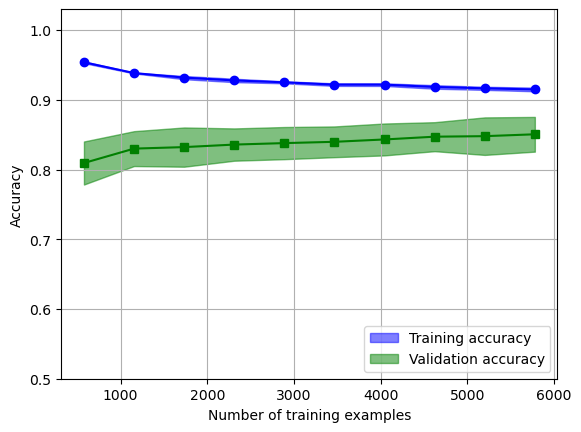

In [76]:
curve(model_pipeline)

In [77]:
from sklearn.model_selection import cross_val_score

vals = cross_val_score(model_pipeline, X_train, y_train, cv=10, n_jobs=-1)
print('Values:', vals)
print('Mean value:', vals.mean())

Values: [0.85600736 0.86875997 0.83063537 0.90212296 0.84421341 0.81911078
 0.82713367 0.83229052 0.87534407 0.84757958]
Mean value: 0.8503197686118813


In [78]:
user_input = pd.DataFrame({
    'area_type': ['Super built-up Area'],
    'availability': ['Ready To Move'],
    'location': ['Marathahalli'],
    'size': [3],
    'total_sqft': [1310],
    'bath': [3],
    'balcony': [1]
})


model_pipeline.predict(user_input)



array([84.7867132])

In [79]:
df.head(10)

,area_type,availability,location,size,total_sqft,bath,balcony,price,bath category
0,Super built-up Area,19-Dec,Electronic City Phase II,2,1056.0,2,1,39.07,1
1,Plot Area,Ready To Move,Chikka Tirupathi,4,2600.0,5,3,120.00,2
2,Built-up Area,Ready To Move,Uttarahalli,3,1440.0,2,3,62.00,1
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3,1521.0,3,1,95.00,1
4,Super built-up Area,Ready To Move,Kothanur,2,1200.0,2,1,51.00,1
5,Super built-up Area,Ready To Move,Whitefield,2,1170.0,2,1,38.00,1
6,Super built-up Area,18-May,Old Airport Road,4,2732.0,4,1,204.00,1
7,Super built-up Area,Ready To Move,Rajaji Nagar,4,3300.0,4,1,600.00,1
8,Super built-up Area,Ready To Move,Marathahalli,3,1310.0,3,1,63.25,1
9,Plot Area,Ready To Move,Gandhi Bazar,6,1020.0,6,1,370.00,2


In [80]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import root_mean_squared_error

y_pred = model_pipeline.predict(X_test)

mean_squared_error(y_test, y_pred)
r2_score(y_test, y_pred)
root_mean_squared_error(y_test, y_pred)

29.022950910453204

In [81]:
import pickle

with open('beng_price.pkl', 'wb') as f:
    pickle.dump(model_pipeline, f)

In [82]:
locs = df7['location'].unique()

In [83]:
cities_list = locs.tolist()

sorted_cities = sorted(cities_list)

cities_json = json.dumps(sorted_cities, indent=4)

with open("cities.json", "w") as file:
    file.write(cities_json)